**What is Linear Regression?** : Linear Regression is a supervised machine learning and statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a straight line.

- It predicts a continuous value by estimating how changes in input variables affect the output.

- Example:

 1. Predict house price based on area

 2. Predict salary based on years of experience

 3. Predict sales based on advertising spend

- Mathematical Form

1. Simple Linear Regression (one predictor):

   - $ Y = \beta_0 + \beta_1 X + \epsilon $

2. Multiple Linear Regression (multiple predictors):

   - $ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \epsilon $
    
   - Where:

        1. Y = dependent variable (target)
        2. X = independent variable(s)
        3. $\beta_0$ is intercept and $\beta_1, \beta_2, ⋯ , \beta_n$ are weightage of predictiors ($X_1, X_2, ..., X_n$)
        4. $ϵ$ = error term (residual)

Goal : The model finds the best-fit line that minimizes the error between actual and predicted values. This is done using Ordinary Least Squares (OLS), which minimizes the sum of squared errors.

In [158]:
# Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df=pd.read_csv('new_insurance_data.csv')
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [161]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [162]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [163]:
df.columns[df.isnull().any()]

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary'],
      dtype='object')

In [164]:
null_obj_col = df.columns[(df.dtypes=='object') & (df.isnull().any())]
null_obj_col

Index([], dtype='object')

There is no object type of column which have null values. if there exist any column then we can fill that value with mode.

In [165]:
null_num_col = df.columns[(df.dtypes!='object') & (df.isnull().any())]
null_num_col

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary'],
      dtype='object')

- Missing values were identified in several columns. Two imputation strategies were considered:

- If data is symmetric and free of outliers → mean imputation

- If data is skewed or contains outliers → median imputation

- Outlier detection was performed before selecting the imputation method.

First we have check outlier so for that we have following methiods:
1. Check distribution
   - Histogram
   - Boxplot
   - Skews right/left → use median

2. Check outliers
   - Boxplot
   - IQR method
   - Extreme values present → use median

- Outliers were examined using distribution plots (histogram, boxplot) and statistical methods to understand skewness and extreme values before applying imputation.



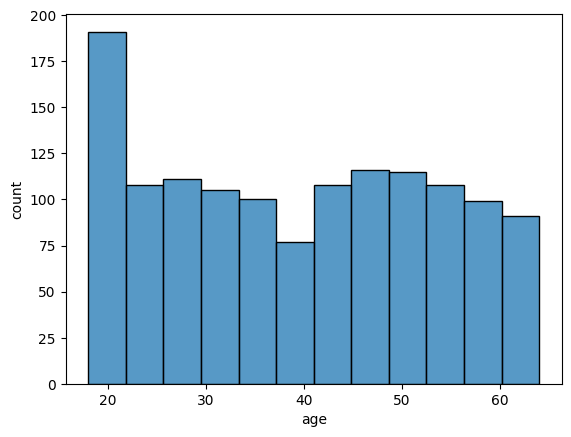

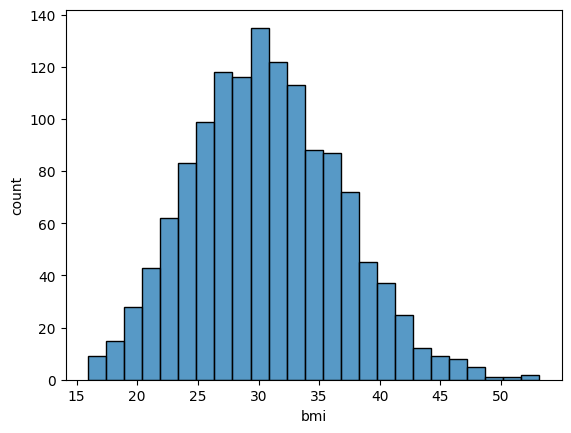

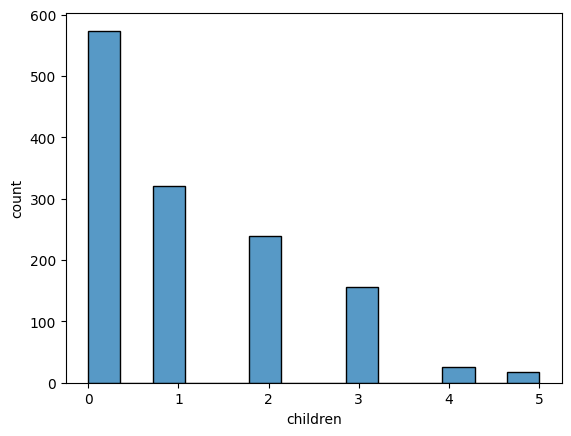

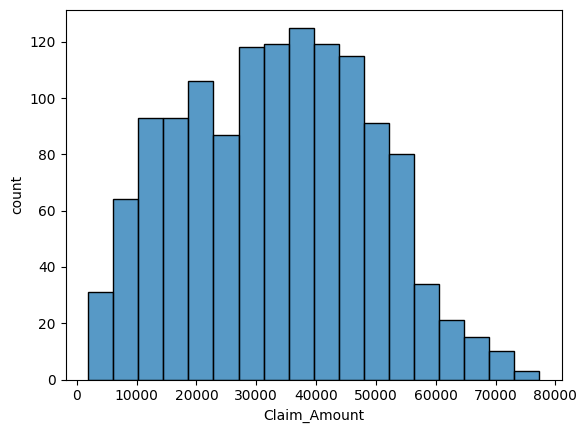

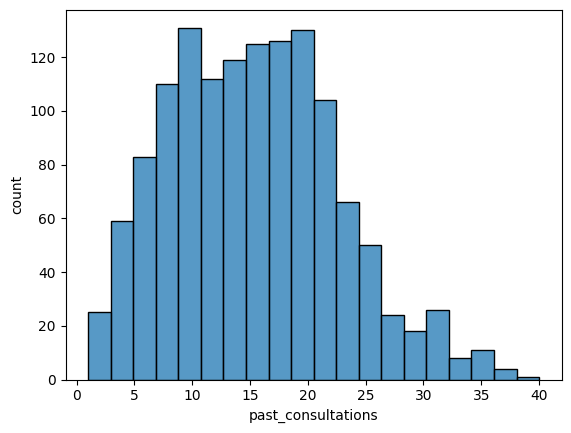

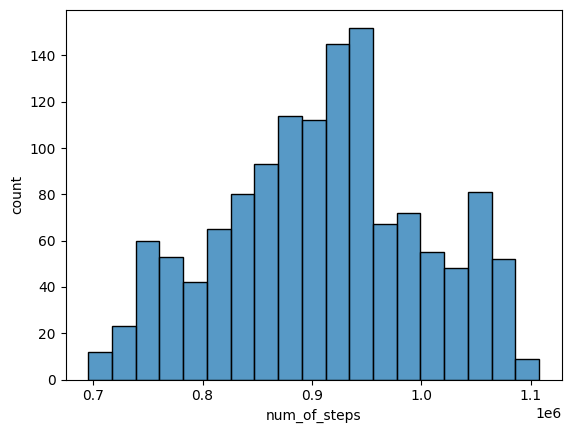

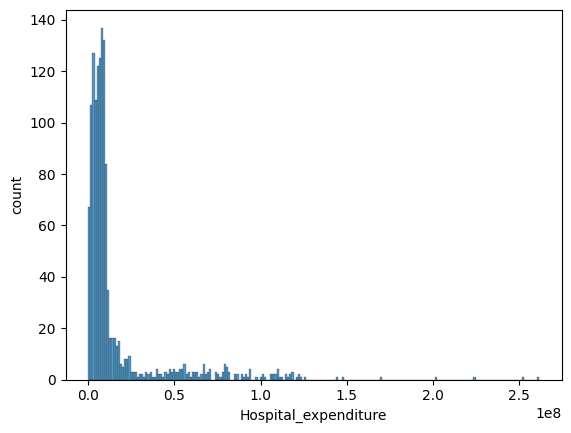

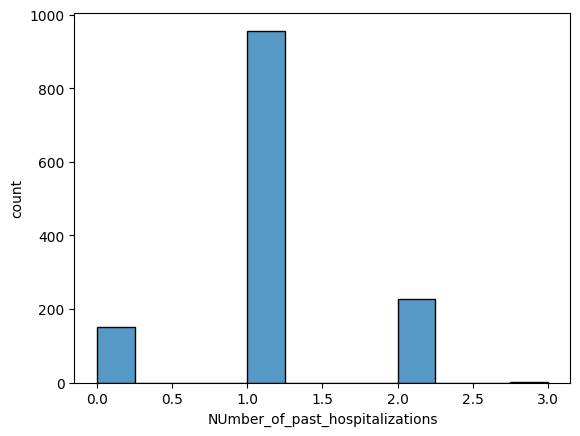

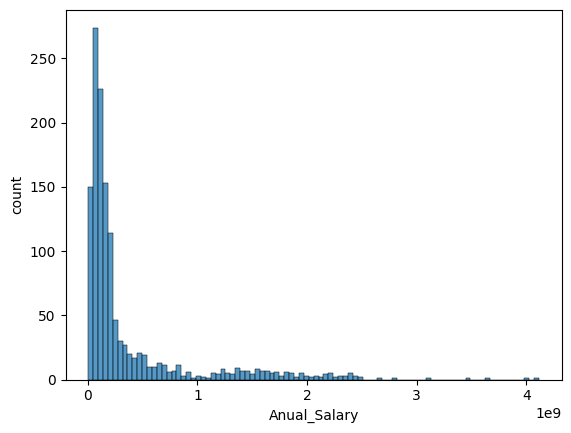

In [166]:
#Histogram plot
for col in df.columns[(df.dtypes != 'object') & (df.isnull().any())]:
    sns.histplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

Histogram analysis revealed that Children, Hospital Expenditure, and Annual Salary are right-skewed. Therefore, median imputation was preferred for these variables to reduce the influence of extreme values.

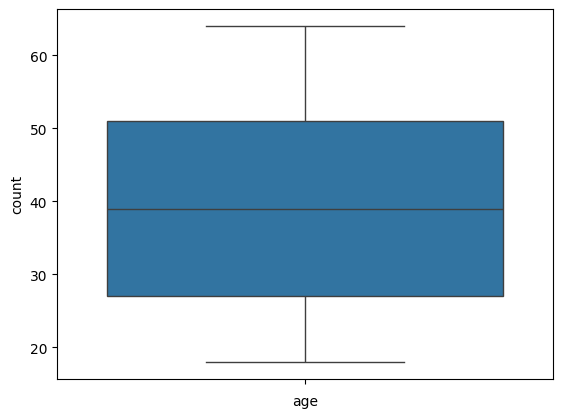

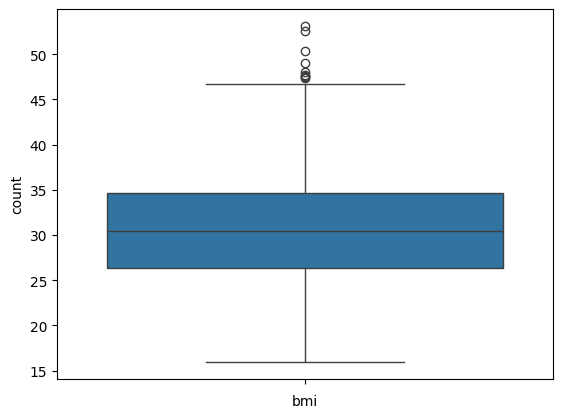

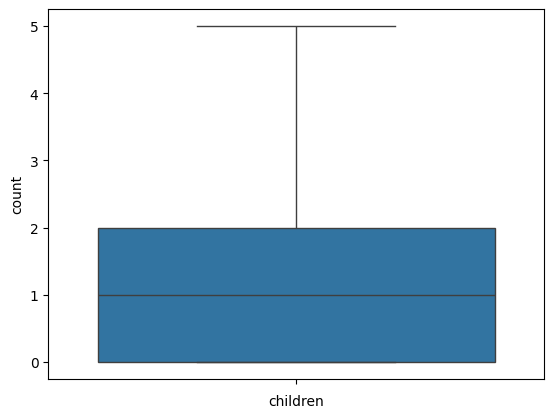

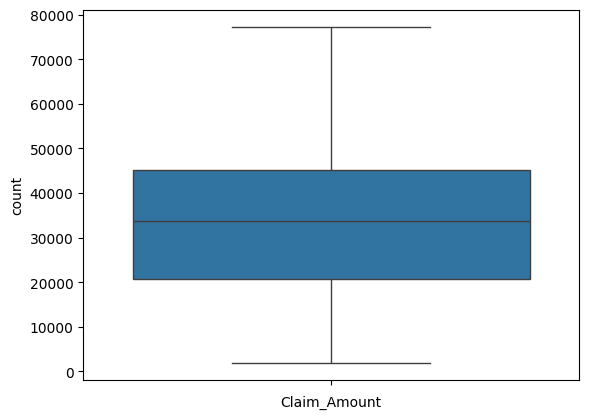

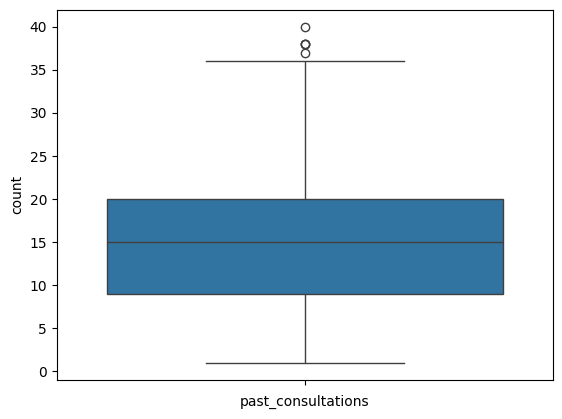

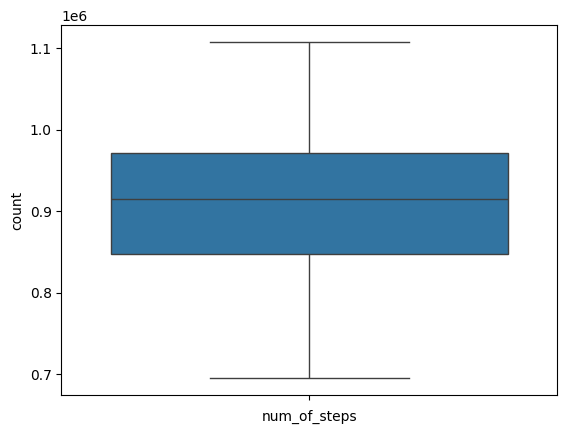

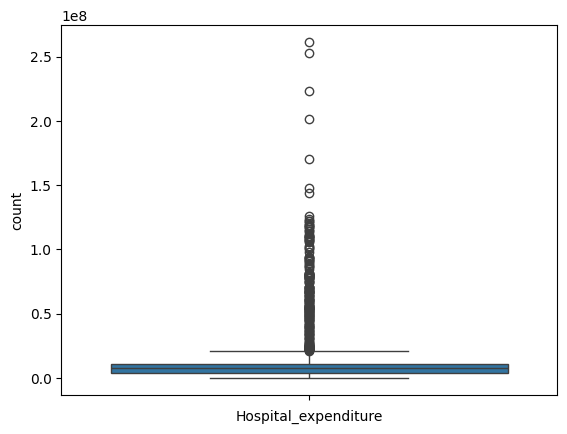

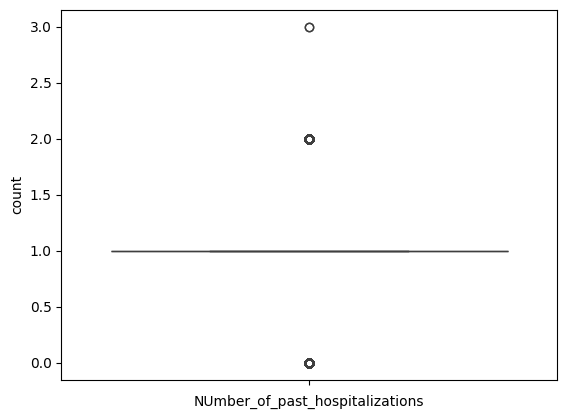

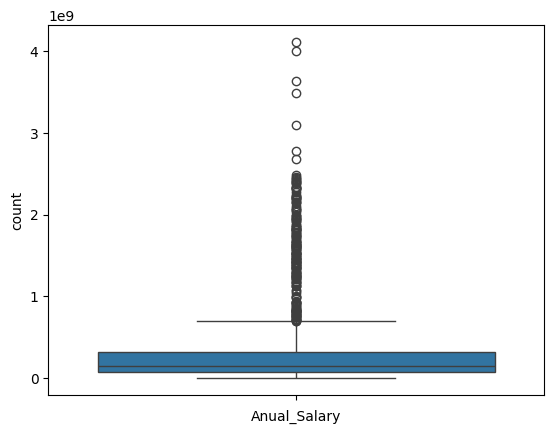

In [167]:
# Box plot
for col in df.columns[(df.dtypes != 'object') & (df.isnull().any())]:
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

For the variable number of past hospitalizations, the values are discrete and limited (e.g., 0, 1, 2, 3, 4, 5), therefore, it should be treated as a count variable rather than continuous data. In such cases, boxplots may appear misleading because the data contains repeated values and a small range of possible outcomes. Instead, a bar plot (or value counts) should be used to understand the distribution and identify the most frequent values.

If the bar plot shows that multiple values share the highest frequency (i.e., the data is multimodal, such as 2 and 3 or 1, 2, and 4 occurring equally often), mode becomes ambiguous. Since the mean may produce unrealistic decimal values for count data, the median is preferred for imputation. The median provides a stable and realistic central value and remains reliable even when multiple modes exist.

**Observations from BOX plots**

 - BMI contains mild skewness and outliers, median imputation is more appropriate.
 - Hospital expenditure and annual salary clearly shows Right skewed.

In [168]:
# check skewness for numeric column only
skew_values = df.skew(numeric_only=True)
skew_values

,0
age,0.045514
bmi,0.283886
children,0.932063
Claim_Amount,0.098208
past_consultations,0.414046
num_of_steps,-0.081690
Hospital_expenditure,3.746780
NUmber_of_past_hospitalizations,0.116388
Anual_Salary,2.614588
charges,1.515880


In [169]:
# symmetric columns (safe for mean)
mean_cols = skew_values[(skew_values >= -0.5) & (skew_values <= 0.5)].index.tolist()

# moderately skewed
moderate_skew_cols = skew_values[(skew_values > 0.5) & (skew_values <= 1)].index.tolist()

# highly skewed columns (use median)
median_cols = skew_values[abs(skew_values) > 1].index.tolist()

print("Mean Imputation Columns:", mean_cols)
print("Moderately Skewed Columns:", moderate_skew_cols)
print("Median Imputation Columns:", median_cols)

Mean Imputation Columns: ['age', 'bmi', 'Claim_Amount', 'past_consultations', 'num_of_steps', 'NUmber_of_past_hospitalizations']
Moderately Skewed Columns: ['children']
Median Imputation Columns: ['Hospital_expenditure', 'Anual_Salary', 'charges']


In [170]:
# mean imputation
for col in mean_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# median imputation (moderate + high skew)
for col in moderate_skew_cols + median_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-1833877903.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1833877903.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [171]:
outlier_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
for col in outlier_list:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    print(col,':',lower_limit,':',upper_limit)
    df=df[(df[col]>=lower_limit)&(df[col]<=upper_limit)]
df

bmi : 13.803125000000003 : 47.168124999999996
past_consultations : -7.5 : 36.5
Hospital_expenditure : -5960217.370000003 : 20753963.026000004
Anual_Salary : -117267392.5 : 383494075.98


,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,1.419361e+08,northeast,19798.05455


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1030 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1030 non-null   float64
 1   sex                              1030 non-null   object 
 2   bmi                              1030 non-null   float64
 3   children                         1030 non-null   float64
 4   smoker                           1030 non-null   object 
 5   Claim_Amount                     1030 non-null   float64
 6   past_consultations               1030 non-null   float64
 7   num_of_steps                     1030 non-null   float64
 8   Hospital_expenditure             1030 non-null   float64
 9   NUmber_of_past_hospitalizations  1030 non-null   float64
 10  Anual_Salary                     1030 non-null   float64
 11  region                           1030 non-null   object 
 12  charges                  

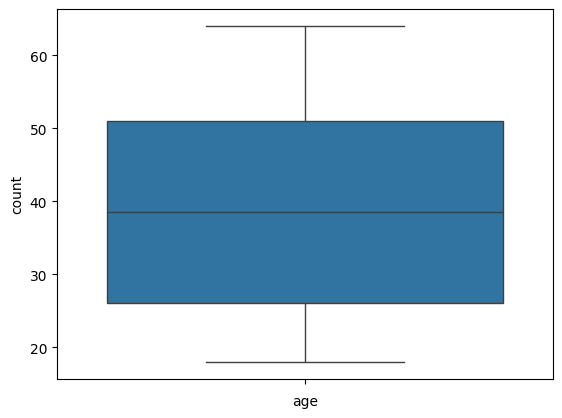

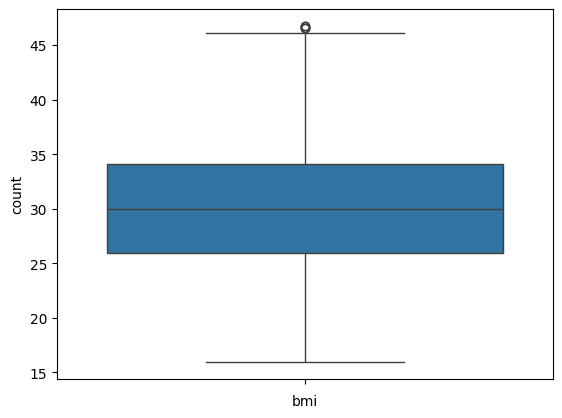

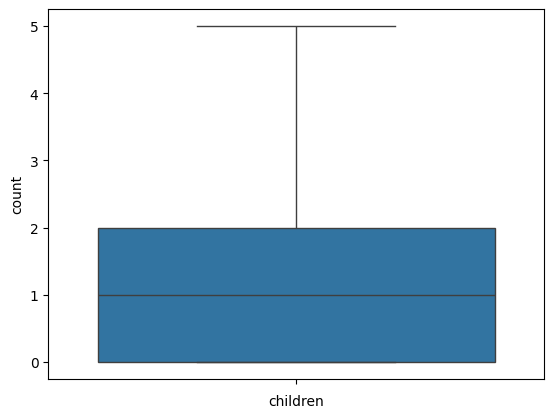

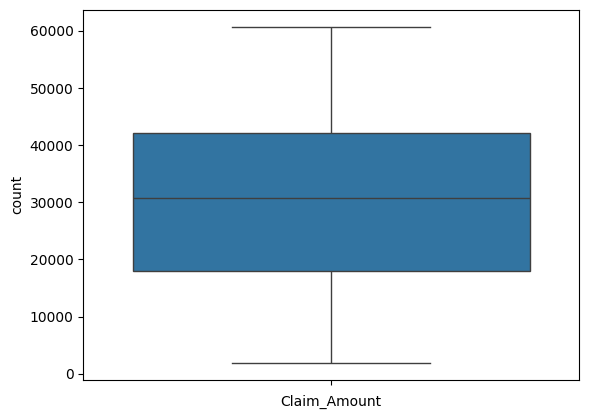

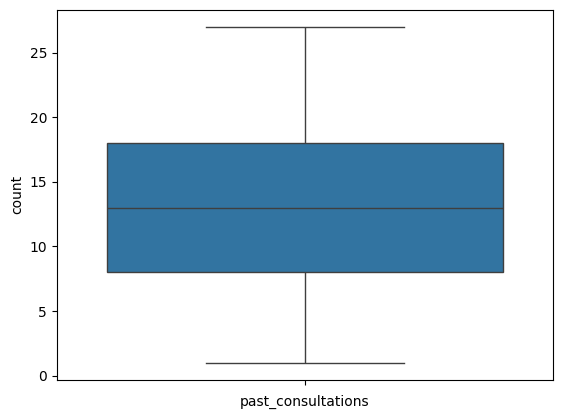

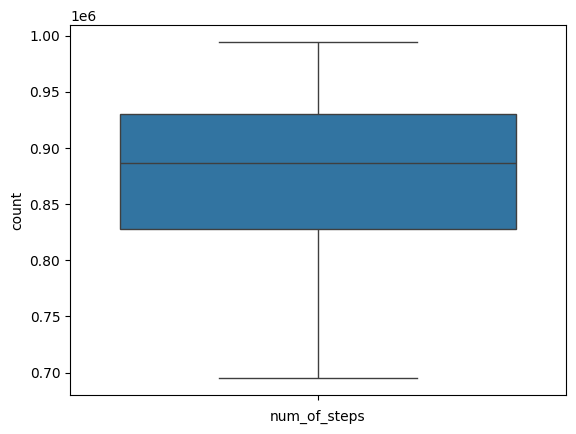

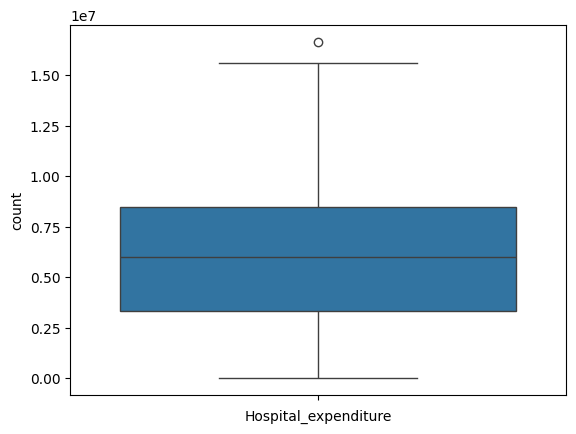

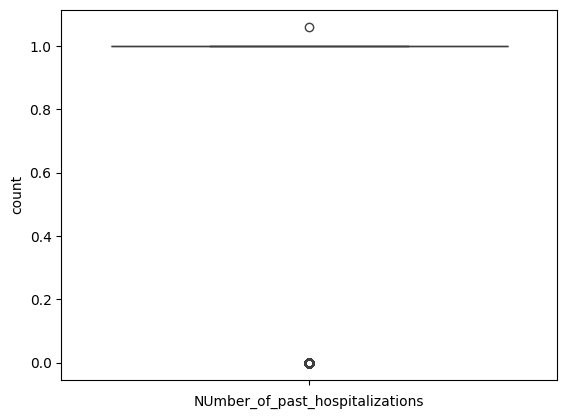

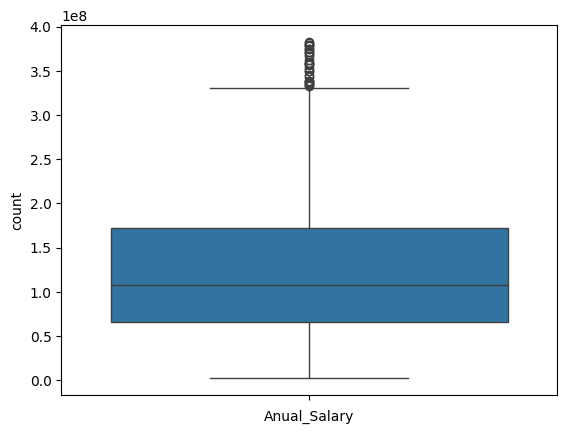

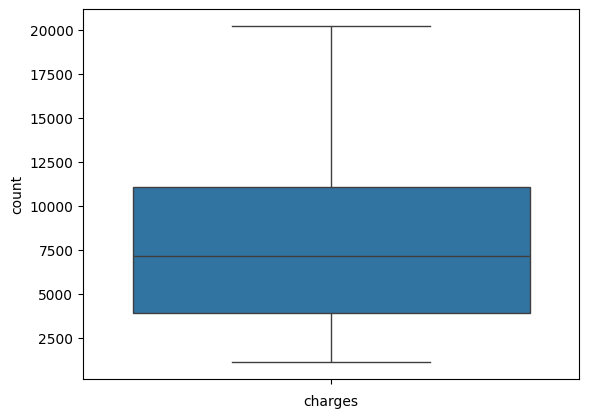

In [173]:
for col in df.columns:
    if df[col].dtype!='object':
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [174]:
# convert object type data into numerical
df[[col for col in df.columns if df[col].dtype=='object']]

,sex,smoker,region
0,male,no,southeast
1,male,no,southeast
2,male,no,southeast
3,male,no,southeast
4,male,no,southeast
...,...,...,...
1046,female,yes,southeast
1048,male,yes,southwest
1050,male,yes,southeast
1062,female,yes,northeast


**Binary Categories (2 unique values)**

 - Examples:
   - sex → male / female
   - smoker → yes / no
 - Use Label Encoding (0 and 1)

**Nominal Categories (more than 2, no order)**

- Example: region → southeast, southwest, northeast, northwest
- Use One-Hot Encoding

In [175]:
# If we have only two categories then we can use mapping
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df

# Another method
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df['sex'] = le.fit_transform(df['sex'])
# df['smoker'] = le.fit_transform(df['smoker'])
# df

# for more than two categories use One hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
encoded=ohe.fit_transform(df[['region']])
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out())
df = df.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

df = pd.concat([df, encoded_df], axis=1)
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,18.0,0,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390,0.0,0.0,1.0,0.0
1,18.0,0,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660,0.0,0.0,1.0,0.0
2,18.0,0,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070,0.0,0.0,1.0,0.0
3,18.0,0,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940,0.0,0.0,1.0,0.0
4,18.0,0,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,29.0,1,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960,0.0,0.0,1.0,0.0
1026,31.0,0,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400,0.0,0.0,0.0,1.0
1027,31.0,0,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890,0.0,0.0,1.0,0.0
1028,43.0,1,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,1.419361e+08,northeast,19798.05455,1.0,0.0,0.0,0.0


Binary variables were label encoded, and nominal variables were one-hot encoded to prepare the dataset for regression modeling.

In [176]:
df.drop('region',axis=1,inplace=True)
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,18.0,0,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,1121.87390,0.0,0.0,1.0,0.0
1,18.0,0,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,1131.50660,0.0,0.0,1.0,0.0
2,18.0,0,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,1135.94070,0.0,0.0,1.0,0.0
3,18.0,0,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,1136.39940,0.0,0.0,1.0,0.0
4,18.0,0,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,1137.01100,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,29.0,1,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,19107.77960,0.0,0.0,1.0,0.0
1026,31.0,0,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,19199.94400,0.0,0.0,0.0,1.0
1027,31.0,0,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,19350.36890,0.0,0.0,1.0,0.0
1028,43.0,1,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,1.419361e+08,19798.05455,1.0,0.0,0.0,0.0


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1030 non-null   float64
 1   sex                              1030 non-null   int64  
 2   bmi                              1030 non-null   float64
 3   children                         1030 non-null   float64
 4   smoker                           1030 non-null   int64  
 5   Claim_Amount                     1030 non-null   float64
 6   past_consultations               1030 non-null   float64
 7   num_of_steps                     1030 non-null   float64
 8   Hospital_expenditure             1030 non-null   float64
 9   NUmber_of_past_hospitalizations  1030 non-null   float64
 10  Anual_Salary                     1030 non-null   float64
 11  charges                          1030 non-null   float64
 12  region_northeast    

**Data Preprocessing Completed**

 - Handled missing values using appropriate imputation methods.

 - Checked distribution and treated outliers where necessary.

 - Converted categorical (object type) columns into numerical format.

 - Encoded binary and nominal variables for model compatibility.

 - Ensured all features are numeric and clean.

**The dataset is now clean, numerically encoded, and ready for model training.**

**Linear Regression Assumptions: Importance and Impact**

 - Linear Regression relies on several statistical assumptions to ensure that the model produces reliable, unbiased, and interpretable results. Although the model can still generate predictions when assumptions are violated, the validity of conclusions and statistical inferences may be compromised.

 - These assumptions are essential when interpreting coefficients, understanding variable relationships, and making data-driven decisions.

 - | Assumption | Why Needed | If Violated | Impact |
|------------|------------|-------------|--------|
| Linearity | Captures the true relationship between predictors and target | • Model underfits the data <br> • Predictions become inaccurate <br> • Important patterns remain unexplained | Affects prediction accuracy |
| No Multicollinearity | Allows clear estimation of each predictor’s effect | • Unstable coefficient estimates <br> • Large changes with small data variations <br> • Difficult interpretation | Affects interpretation & stability |
| Independence of Errors | Ensures reliability of statistical tests | • Misleading significance tests <br> • Underestimated standard errors <br> • Overconfident conclusions | Affects statistical inference |
| Homoscedasticity | Ensures reliable confidence intervals and hypothesis testing | • Unreliable confidence intervals <br> • Invalid hypothesis tests <br> • Reduced model reliability | Affects inference & reliability |
| Normality of Residuals | Needed for valid hypothesis testing and confidence intervals | • Hypothesis tests become unreliable <br> • Confidence intervals may be inaccurate | Affects inference (less impact on prediction) |


- | Stage | Assumption | Why Check | How to Assess |
|-------|------------|-----------|---------------|
| **Before Training** | Linearity | Ensure predictors have a linear relationship with target | Scatter plots,  correlation check |
| **Before Training** | Multicollinearity | Prevent unstable and hard-to-interpret coefficients | Correaltion matrix, VIF (Variance Inflation Factor) |
| **Before Training** | Outliers in features | Prevent distortion of model fit | Boxplot, IQR method, Z-score |
| **After Training** | Independence of errors | Ensure residuals are not correlated | Durbin–Watson test, residual sequence plot |
| **After Training** | Homoscedasticity | Verify constant variance of residuals | Residual vs fitted values plot, Breusch–Pagan test |
| **After Training** | Normality of residuals | Required for valid inference & confidence intervals | Histogram, Q-Q plot, Shapiro–Wilk test |


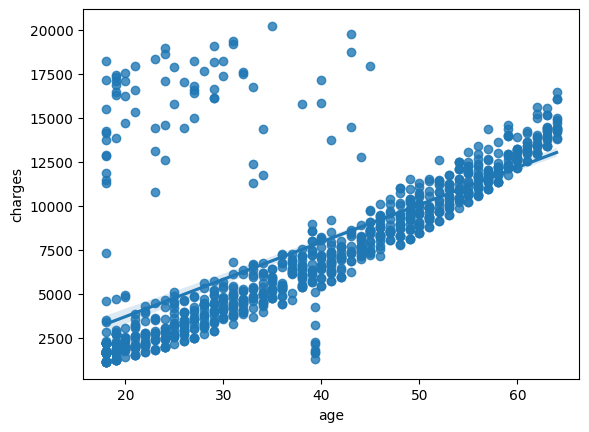

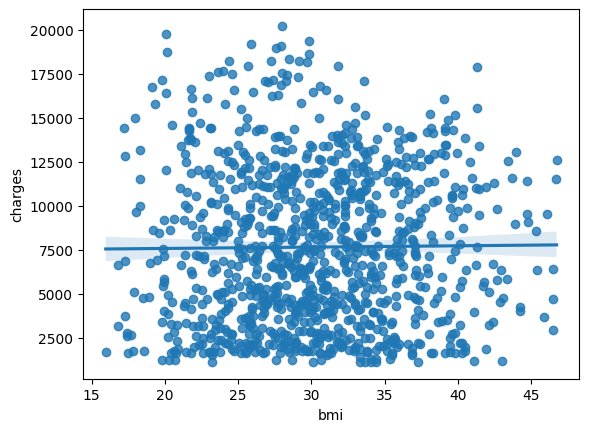

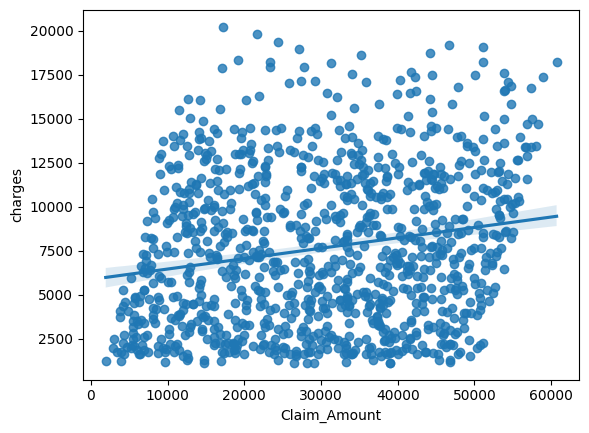

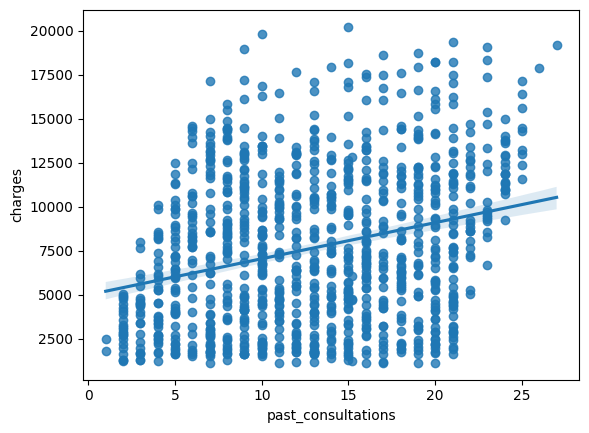

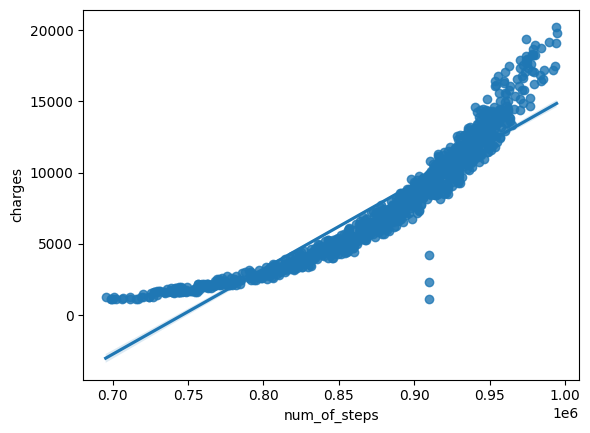

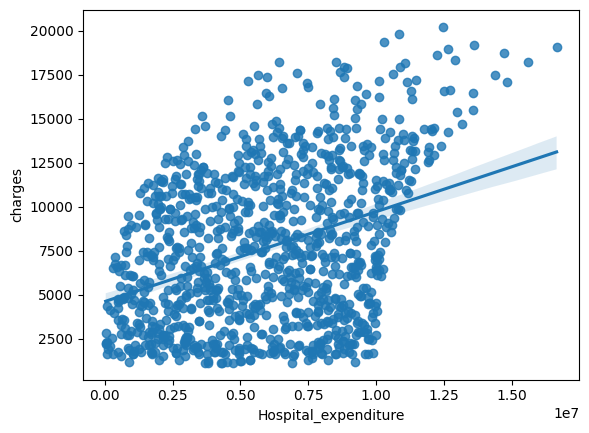

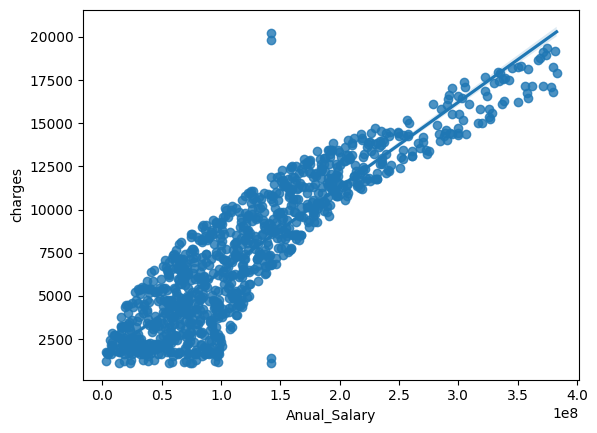

In [178]:
# To assess the linearity assumption of Linear Regression, regression plots
# (scatter plot with fitted line) are created between each feature and the
# target variable (charges). This helps visualize whether a linear relationship
# exists between predictors and the response variable.
#
# Linearity checking is meaningful only for continuous numerical features.
# Discrete count variables (e.g., children, number of hospitalizations),
# binary variables (0/1), and encoded categorical variables do not represent
# continuous relationships; therefore, evaluating linearity for them is not useful.
#
# In the plots:
# - an upward or downward trend indicates a linear relationship,
# - a random scatter suggests weak or no relationship,
# - a curved pattern indicates a non-linear relationship.
#
# Note: Perfect straight-line alignment is not required; an approximate linear
# trend is sufficient to satisfy the linearity assumption.


# continuous variables only
continuous_cols = ['age', 'bmi', 'Claim_Amount','past_consultations', 'num_of_steps','Hospital_expenditure', 'Anual_Salary']
for col in continuous_cols:
    sns.regplot(x=df[col], y=df['charges'])
    plt.xlabel(col)
    plt.ylabel('charges')
    plt.show()

In [179]:
# Check multicolinearity through correlation matrix
df.corr()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.023059,0.155957,0.045569,-0.200075,0.117750,0.172063,0.749468,0.166923,0.519538,0.506958,0.676071,-0.005218,0.008789,-0.037346,0.033475
sex,0.023059,1.000000,-0.004619,-0.017707,-0.011396,0.036191,-0.002889,0.080437,0.011624,0.095626,0.045913,0.065831,-0.006207,-0.006699,-0.002343,0.015037
bmi,0.155957,-0.004619,1.000000,0.006231,-0.212074,0.008343,0.023543,0.040324,0.017145,0.016121,0.006511,0.010248,-0.149596,-0.121930,0.262957,0.006239
children,0.045569,-0.017707,0.006231,1.000000,-0.023380,0.041953,0.045568,0.228949,-0.007008,0.316471,0.071375,0.138682,-0.032601,0.009309,-0.003872,0.026558
smoker,-0.200075,-0.011396,-0.212074,-0.023380,1.000000,0.130794,0.135397,0.303342,0.272398,0.087513,0.492710,0.445769,0.045722,-0.024457,-0.003454,-0.017143
Claim_Amount,0.117750,0.036191,0.008343,0.041953,0.130794,1.000000,0.071569,0.185434,0.052279,0.109748,0.168878,0.192601,-0.038966,0.059922,-0.000454,-0.020703
past_consultations,0.172063,-0.002889,0.023543,0.045568,0.135397,0.071569,1.000000,0.259401,0.089657,0.135498,0.267111,0.278131,-0.031870,0.015439,0.028267,-0.012123
num_of_steps,0.749468,0.080437,0.040324,0.228949,0.303342,0.185434,0.259401,1.000000,0.310650,0.714983,0.783088,0.936946,0.074359,0.009844,-0.072925,-0.010197
Hospital_expenditure,0.166923,0.011624,0.017145,-0.007008,0.272398,0.052279,0.089657,0.310650,1.000000,0.135239,0.374759,0.368815,0.035898,-0.066904,-0.021889,0.052795
NUmber_of_past_hospitalizations,0.519538,0.095626,0.016121,0.316471,0.087513,0.109748,0.135498,0.714983,0.135239,1.000000,0.376874,0.538116,0.050187,0.057004,-0.094409,-0.011885


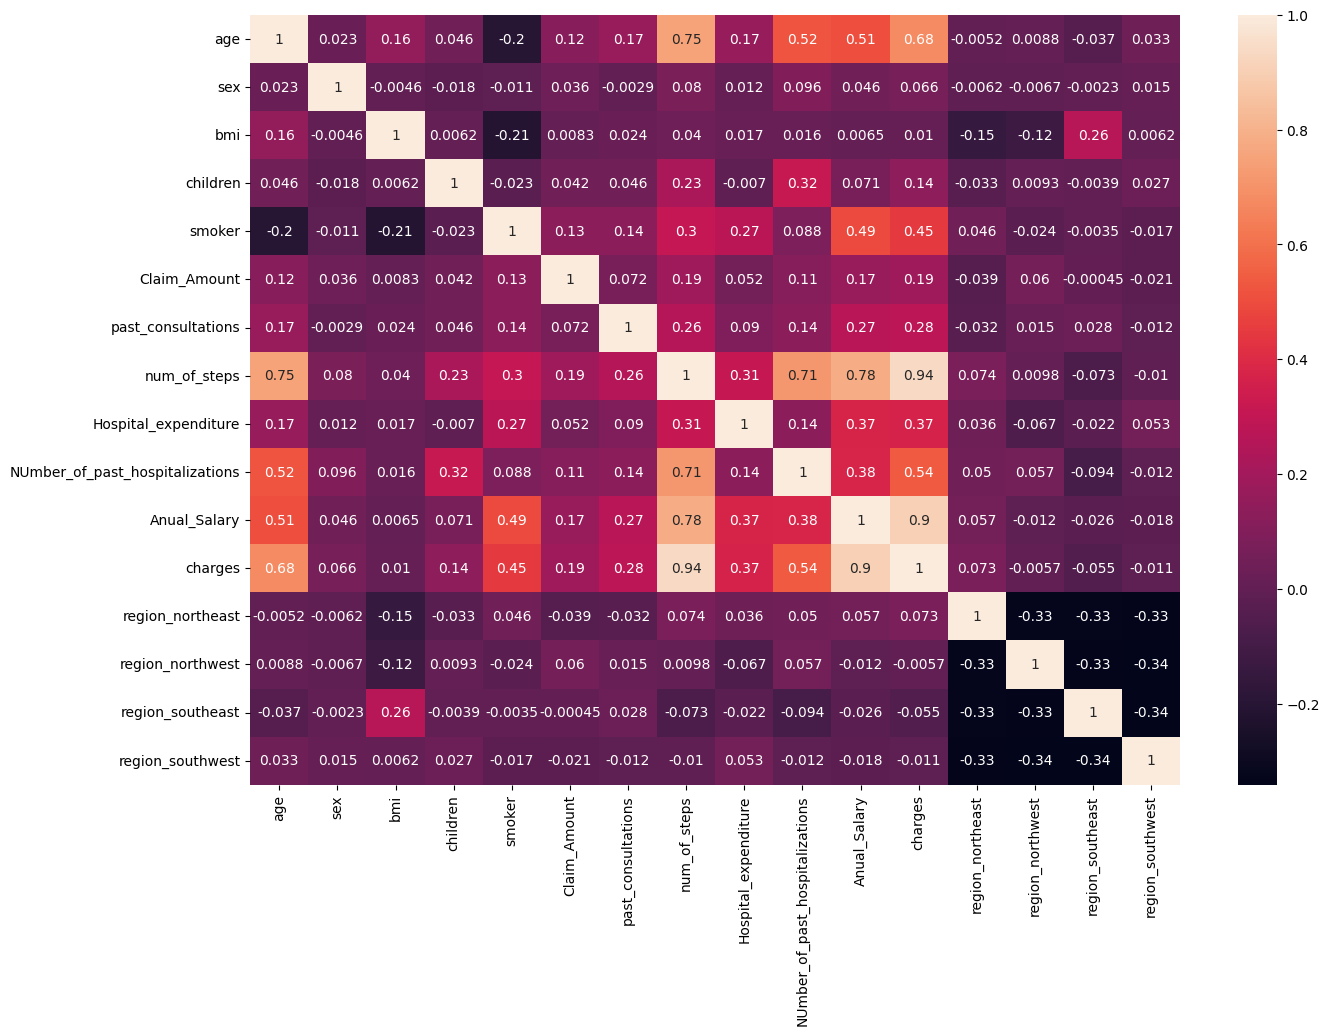

In [180]:
# visual graph for correlation matrix show
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Strong correlations visible:

 1. num_of_steps ↔ charges ≈ 0.94

 2. Anual_Salary ↔ charges ≈ 0.90

 3. num_of_steps ↔ Anual_Salary ≈ 0.78

 4. age ↔ num_of_steps ≈ 0.75

**These indicate strong linear relationships.**

Strong correlations indicate strong predictive relationships, while high correlations among predictors were further evaluated using VIF.

In [181]:
# Variance Inflation Factor (VIF) is used to detect multicollinearity
# among independent variables in a regression model. Multicollinearity
# occurs when two or more predictors are highly correlated, making it
# difficult to estimate the individual effect of each variable.

# High multicollinearity can lead to:
# - unstable and unreliable coefficient estimates
# - large changes in coefficients with small data variations
# - difficulty in interpreting variable importance
# - increased standard errors and reduced statistical significance

# VIF measures how much the variance of a regression coefficient is
# inflated due to correlation with other predictors.

# Interpretation of VIF values:
# VIF = 1        → No correlation between predictors
# 1 < VIF < 5    → Moderate correlation (acceptable)
# 5 ≤ VIF < 10   → High correlation (should be investigated)
# VIF ≥ 10       → Serious multicollinearity (action required)

# If high VIF is detected, possible solutions include:
# - removing one of the correlated variables
# - combining correlated features
# - applying dimensionality reduction (e.g., PCA)
# - using regularization techniques (Ridge/Lasso regression)

# Checking VIF helps ensure model stability, reliable coefficient
# estimates, and meaningful interpretation of predictors.

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Select only independent variables (drop target)
X = df.drop(columns=['charges'])   # replace 'charges' with your target column

# Ensure only numeric columns are used
X = X.select_dtypes(include=['int64','float64'])

# Create VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,age,5.201285
1,sex,1.033722
2,bmi,1.173376
3,children,1.281550
4,smoker,2.854756
5,Claim_Amount,1.051424
6,past_consultations,1.091570
7,num_of_steps,10.874266
8,Hospital_expenditure,1.194152
9,NUmber_of_past_hospitalizations,2.636083


- To decide which features to remove, start by addressing the region dummy variables. The columns region_northeast, region_northwest, region_southeast, and region_southwest show extremely high VIF values because they come from the same categorical variable. These columns are linearly dependent, creating the dummy variable trap. Remove any one of them (use it as a reference category). This will not affect model predictions but will remove multicollinearity.

- The feature num_of_steps has a VIF above 10, indicating strong multicollinearity with other predictors such as age and annual salary. If your goal is model stability and easier interpretation, you may remove it. If prediction accuracy is the priority, you may keep it because it is strongly related to the target.

- All remaining variables have acceptable VIF values (< 5), so they can be kept. After removing one region dummy column, recalculate VIF to confirm that multicollinearity has been resolved.

In [182]:
# Drop two columns  1. one of the region and number of steps
df.drop(['region_northeast','num_of_steps'],axis=1,inplace=True)
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges,region_northwest,region_southeast,region_southwest
0,18.0,0,23.210,0.0,0,29087.54313,17.0,4.720921e+06,0.0,5.578497e+07,1121.87390,0.0,1.0,0.0
1,18.0,0,30.140,0.0,0,39053.67437,7.0,4.329832e+06,0.0,1.370089e+07,1131.50660,0.0,1.0,0.0
2,18.0,0,33.330,0.0,0,39023.62759,19.0,6.884861e+06,0.0,7.352311e+07,1135.94070,0.0,1.0,0.0
3,18.0,0,33.660,0.0,0,28185.39332,11.0,4.274774e+06,0.0,7.581968e+07,1136.39940,0.0,1.0,0.0
4,18.0,0,34.100,0.0,0,14697.85941,16.0,3.787294e+06,0.0,2.301232e+07,1137.01100,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,29.0,1,27.940,1.0,1,51168.25474,23.0,1.665982e+07,1.0,3.712188e+08,19107.77960,0.0,1.0,0.0
1026,31.0,0,25.900,3.0,1,46619.40230,27.0,1.361938e+07,1.0,3.812895e+08,19199.94400,0.0,0.0,1.0
1027,31.0,0,29.810,0.0,1,24382.58056,21.0,1.028991e+07,1.0,3.745310e+08,19350.36890,0.0,1.0,0.0
1028,43.0,1,20.045,2.0,1,21596.43846,10.0,1.083030e+07,1.0,1.419361e+08,19798.05455,0.0,0.0,0.0


One dummy variable was removed to prevent multicollinearity while preserving model interpretability.

**One dummy variable was removed to prevent multicollinearity while preserving model interpretability.**

**Now Train the Model**

In [183]:
# model Building
x=df.drop('charges',axis=1)
y=df['charges']

In [184]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region_northwest,region_southeast,region_southwest
0,18.0,0,23.210,0.0,0,29087.54313,17.0,4.720921e+06,0.0,5.578497e+07,0.0,1.0,0.0
1,18.0,0,30.140,0.0,0,39053.67437,7.0,4.329832e+06,0.0,1.370089e+07,0.0,1.0,0.0
2,18.0,0,33.330,0.0,0,39023.62759,19.0,6.884861e+06,0.0,7.352311e+07,0.0,1.0,0.0
3,18.0,0,33.660,0.0,0,28185.39332,11.0,4.274774e+06,0.0,7.581968e+07,0.0,1.0,0.0
4,18.0,0,34.100,0.0,0,14697.85941,16.0,3.787294e+06,0.0,2.301232e+07,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,29.0,1,27.940,1.0,1,51168.25474,23.0,1.665982e+07,1.0,3.712188e+08,0.0,1.0,0.0
1026,31.0,0,25.900,3.0,1,46619.40230,27.0,1.361938e+07,1.0,3.812895e+08,0.0,0.0,1.0
1027,31.0,0,29.810,0.0,1,24382.58056,21.0,1.028991e+07,1.0,3.745310e+08,0.0,1.0,0.0
1028,43.0,1,20.045,2.0,1,21596.43846,10.0,1.083030e+07,1.0,1.419361e+08,0.0,0.0,0.0


In [185]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1025,19107.77960
1026,19199.94400
1027,19350.36890
1028,19798.05455


The dataset was split into training and testing sets, and a Linear Regression model was trained to predict insurance charges.

In [186]:
#Splitting data into training(80%) and testing(20%)
#random_state=42: ensures same split everytime

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)



In [187]:
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region_northwest,region_southeast,region_southwest
995,27.0,1,24.750,0.0,1,53835.714590,13.000000,1.251042e+07,1.0,2.997861e+08,0.0,1.0,0.0
507,46.0,0,22.300,0.0,0,39421.715810,11.000000,8.322795e+06,1.0,7.356161e+07,0.0,0.0,1.0
334,35.0,0,27.610,1.0,0,45580.280500,15.216216,6.640575e+05,1.0,5.521018e+07,0.0,1.0,0.0
848,60.0,0,25.740,0.0,0,10462.197210,15.000000,8.333001e+06,1.0,2.155723e+08,0.0,1.0,0.0
294,32.0,1,29.735,0.0,0,16081.646280,10.000000,8.748337e+04,1.0,9.833337e+07,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,20.0,0,33.000,1.0,0,9408.348963,14.000000,2.503468e+06,0.0,1.780433e+07,0.0,0.0,1.0
330,30.0,1,22.895,1.0,0,32439.939850,11.000000,3.852491e+06,1.0,9.007806e+07,0.0,0.0,0.0
466,36.0,0,28.595,3.0,0,38533.729650,4.000000,9.075925e+06,1.0,1.281622e+08,1.0,0.0,0.0
121,18.0,1,40.185,0.0,0,45623.681360,18.000000,3.561362e+06,0.0,3.826765e+07,0.0,0.0,0.0


In [188]:
y_train

,charges
995,16577.77950
507,7147.10500
334,4747.05290
848,12142.57860
294,4357.04365
...,...
87,1980.07000
330,4719.52405
466,6548.19505
121,2217.46915


In [189]:
x_test

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region_northwest,region_southeast,region_southwest
31,18.000000,1,36.85,0.0,0,42510.441160,13.0,3.456345e+06,0.0,7.155619e+07,0.0,1.0,0.0
109,22.000000,1,28.05,0.0,0,23409.828700,7.0,8.996912e+06,0.0,7.086384e+06,0.0,1.0,0.0
136,23.000000,0,24.51,0.0,0,38358.041560,15.0,2.346913e+06,0.0,5.426396e+07,0.0,0.0,0.0
88,24.000000,0,32.01,0.0,0,2912.590584,11.0,7.899220e+06,0.0,4.031690e+07,0.0,1.0,0.0
918,56.000000,1,32.30,3.0,0,10876.549050,10.0,9.505950e+06,1.0,2.728641e+08,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,36.000000,0,27.55,3.0,0,49292.199920,7.0,3.732688e+05,1.0,8.403831e+07,0.0,0.0,0.0
545,38.000000,1,30.21,3.0,0,21969.960480,16.0,4.983099e+06,1.0,7.423690e+07,1.0,0.0,0.0
110,39.310008,1,28.82,0.0,0,43225.257010,18.0,1.110036e+06,0.0,2.128683e+07,0.0,1.0,0.0
514,42.000000,0,37.18,2.0,0,51466.023220,16.0,3.901163e+05,1.0,6.759640e+07,0.0,1.0,0.0


In [190]:
y_test

,charges
31,1629.8335
109,2155.6815
136,2396.0959
88,1981.5819
918,13430.2650
...,...
482,6746.7425
545,7537.1639
110,2156.7518
514,7162.0122


In [191]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [192]:
model.fit(x_train,y_train)
#model learns relationship between x_train(ques) and y_train(ans)

LinearRegression()

In [193]:
y_pred=model.predict(x_test)

In [194]:
y_pred

array([ 2083.31547884,   764.47150238,  2321.86866388,  1659.81334281,
       14883.99961596, 19108.10309707, 12164.78155355,  3576.39016238,
        4196.53534303,  7897.70358709, 12314.96767248,  7300.83470265,
        1353.62668414,  2684.05353447,  5710.26333499,  7119.27657866,
       11646.09611256,  9137.17313912, 10367.10476151,  5964.46608117,
        7105.30701788,  5828.44656525,  5765.31278884,  7890.35203629,
        5497.80829515,  4638.23343672,  8414.12318951, 14679.08049133,
        6276.42346852,  7178.40738558,  5650.632376  ,  6916.27965798,
       11052.01846108,  6012.05611665,  5203.72315892,   631.65235826,
        4740.44494402, 15854.7602873 ,  8367.04893952,  3569.04166371,
        9125.77663022,  9285.13341405,  -152.32986811,  8241.30808053,
        4315.09913393,  2397.69546464,  4723.41937535,  9414.28350761,
       11826.02120811, 10475.479588  , 13340.82975346,  9260.21854905,
       12509.93867656,  8508.83180895,  4874.57678421,   667.61584231,
      

In [195]:
y_test

,charges
31,1629.8335
109,2155.6815
136,2396.0959
88,1981.5819
918,13430.2650
...,...
482,6746.7425
545,7537.1639
110,2156.7518
514,7162.0122


In [196]:
# Creating data frame for comparision (difference between actual and predicted value)

results=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
results

,Actual,Predicted
31,1629.8335,2083.315479
109,2155.6815,764.471502
136,2396.0959,2321.868664
88,1981.5819,1659.813343
918,13430.2650,14883.999616
...,...,...
482,6746.7425,6482.173770
545,7537.1639,6598.942742
110,2156.7518,3481.012747
514,7162.0122,6298.438372


In [197]:
# To chcek the model perfomance through metric
from sklearn.metrics import *

In [198]:
# cehck training and testing accuracy

y_train_pred = model.predict(x_train)
print('Training Accuracy:', r2_score(y_train, y_train_pred))
print('Testing Accuracy:', r2_score(y_test, y_pred))

Training Accuracy: 0.9291185040130779
Testing Accuracy: 0.9207299929344464


In [199]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 1596771.580569912
RMSE: 1263.6342748477155


In [200]:
target_mean = df['charges'].mean()

In [201]:
rmse / target_mean

np.float64(0.16509469887785344)

- The RMSE represents approximately 16.5% of the average target value, indicating good predictive accuracy and reliable model performance.

- This indicates strong predictive performance with low average error.

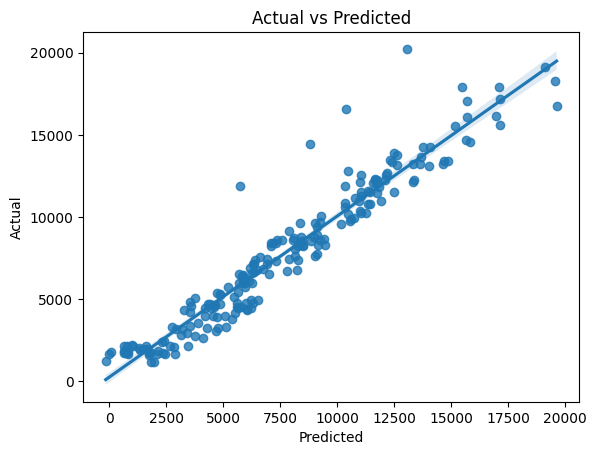

In [202]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')
plt.show()

**Independence of Errors**

In [203]:
# Durbin–Watson test checks independence of residuals.
# Value ≈ 2 → no autocorrelation (good)
# < 1.5 → positive autocorrelation
# > 2.5 → negative autocorrelation

from statsmodels.stats.stattools import durbin_watson

residuals = y_test - y_pred
durbin_watson_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {durbin_watson_stat}")

Durbin-Watson statistic: 1.9157248215245126


- The Durbin–Watson statistic is close to 2, indicating no autocorrelation among residuals and confirming independence of errors.

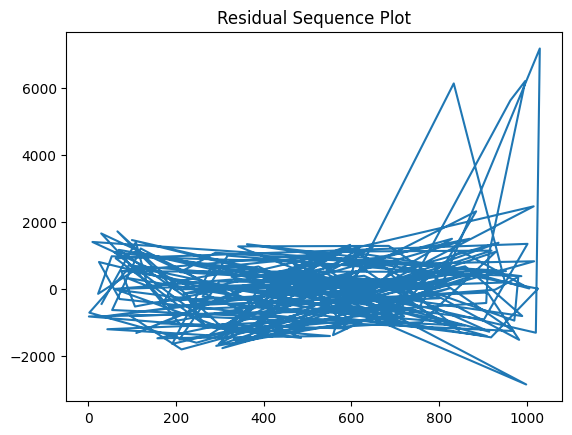

In [204]:
import matplotlib.pyplot as plt

plt.plot(residuals)
plt.title("Residual Sequence Plot")
plt.show()

**Homoscedasticity (Constant Variance)**

The residual plot shows a random spread, indicating constant variance and satisfying the homoscedasticity assumption.



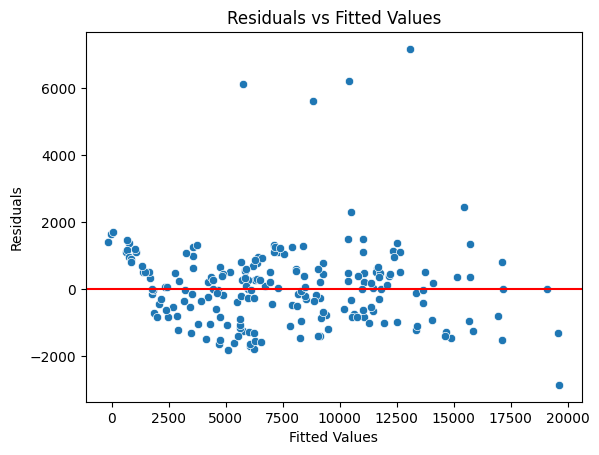

In [205]:
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In [206]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

bp_test = het_breuschpagan(residuals, sm.add_constant(x_test))
bp_test

(np.float64(32.151850913674224),
 np.float64(0.0022808626868478887),
 np.float64(2.731453330378358),
 np.float64(0.001435087074523589))

**Normality of Residuals**

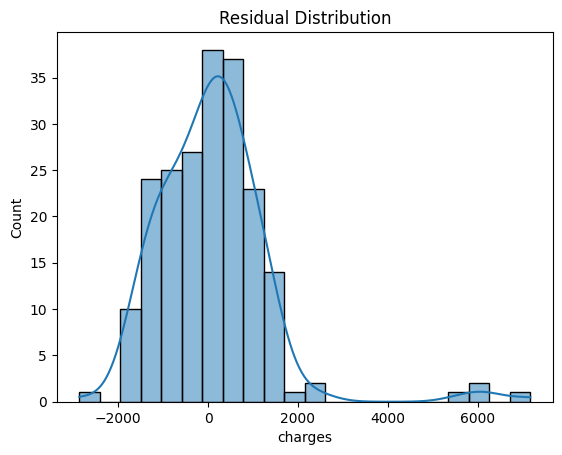

In [207]:
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

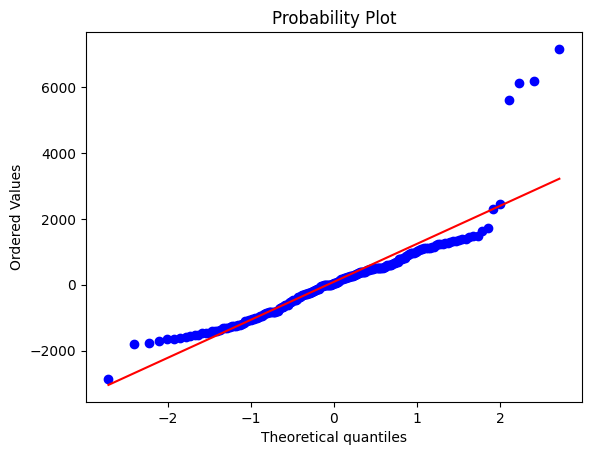

In [208]:
from scipy import stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

In [209]:
# Shapiro–Wilk test checks whether residuals are normally distributed.
# H0: residuals are normal.
# If p-value > 0.05 → normality satisfied.
# If p-value ≤ 0.05 → residuals are not normal.

from scipy.stats import shapiro

shapiro(residuals)

ShapiroResult(statistic=np.float64(0.8307536733771592), pvalue=np.float64(3.2054337120430145e-14))

The Shapiro–Wilk test indicates that the residuals deviate from normality (p < 0.05). However, given the large sample size, this deviation is unlikely to significantly impact the models predictive performance.

**The dataset was cleaned, imputed, and encoded to prepare it for modeling. Linear regression assumptions were evaluated through diagnostic tests, confirming independence of errors, homoscedasticity, and acceptable residual behavior. The model achieved strong predictive performance with low error, indicating reliable generalization to unseen data.**